# Dynamic Phasors for Different Timesteps and Frequencies

In [2]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt

In the following, we have a look at dynamic phasor (DP) and EMT simulations with different timesteps and signal frequencies. The circuit under consideration is depicted below.  
The component parameters are $R_{line} = 1 \Omega, L_{line} = 0.02 H, R_{load} = 10 \Omega, V_{src} = 230 V$.  
The voltage source frequency is set to $60 Hz$ or $500 Hz$ depending on the scenario.

![RL Circuit](Figures/rl_circuit.svg)

## 60 Hz Source Frequency

First, we simulate the circuit with the source set to 60 Hz.  

In the dynamic phasor simulation, we us a phasor shifted by 50 Hz. Therefore, this phasor should be rotating with a frequency of 10 Hz to compensate for the difference of the source frequency and the shifting frequency.

### 100 µs timestep

100µs is a fairly small simulation timestep compared to the source frequency. So, we do not expect any distortion in the EMT or DP results.

In [3]:
# read log file
work_dir = '../../../logs/DP_VS_RL_f60/'
log_name = 'DP_VS_RL_f60'
print(work_dir + log_name + '.csv')

ts_dpsim_dp_f60 = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_dp_f60_emt = ts.frequency_shift_list(ts_dpsim_dp_f60, 50)

../../../logs/DP_VS_RL_f60/DP_VS_RL_f60.csv
column number: 4
results length: 2001
real column names: []
complex column names: ['i_line', 'v1', 'v2', 'v3']


In [4]:
# read log file
work_dir = '../../../logs/EMT_VS_RL_f60/'
log_name = 'EMT_VS_RL_f60'
print(work_dir + log_name + '.csv')

ts_dpsim_emt_f60 = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

../../../logs/EMT_VS_RL_f60/EMT_VS_RL_f60.csv
column number: 4
results length: 2001
real column names: ['i_line', 'v1', 'v2', 'v3']
complex column names: []


Text(0.5, 1.0, 'DP 50Hz shift (100µs ts), 60Hz source')

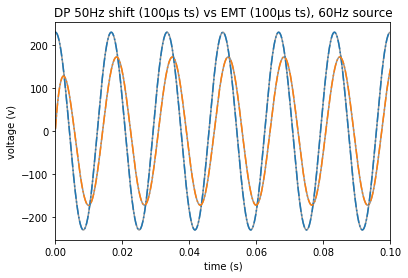

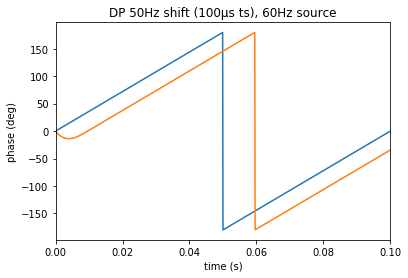

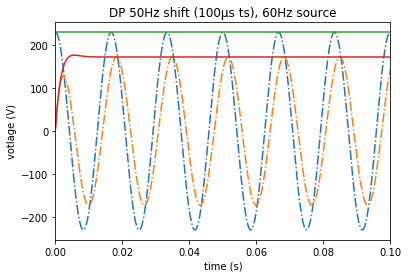

In [47]:
plt.plot(ts_dpsim_emt_f60['v1'].time, ts_dpsim_emt_f60['v1'].values, color='#939393ff', label='v1 emt')
plt.plot(ts_dpsim_emt_f60['v3'].time, ts_dpsim_emt_f60['v3'].values, color='#939393ff', label='v3 emt')
plt.plot(ts_dpsim_dp_f60_emt['v1_shift'].time, ts_dpsim_dp_f60_emt['v1_shift'].values, linestyle='-.', label='v1 dp')
plt.plot(ts_dpsim_dp_f60_emt['v3_shift'].time, ts_dpsim_dp_f60_emt['v3_shift'].values, linestyle='-.', label='v3 dp')
plt.xlim([0,0.1])
plt.xlabel('time (s)')
plt.ylabel('voltage (v)')
plt.title('DP 50Hz shift (100µs ts) vs EMT (100µs ts), 60Hz source')
plt.savefig('emt_dp_100mics_60Hz_src.pdf')

ts_dpsim_dp_f60_phasors = ts.phasors(ts_dpsim_dp_f60)
plt.figure()
plt.plot(ts_dpsim_dp_f60_phasors['v1']['phase'].time, ts_dpsim_dp_f60_phasors['v1']['phase'].values, label='v1 dp')
plt.plot(ts_dpsim_dp_f60_phasors['v3']['phase'].time, ts_dpsim_dp_f60_phasors['v3']['phase'].values, label='v3 dp')
plt.xlim([0,0.1])
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')
plt.title('DP 50Hz shift (100µs ts), 60Hz source')
plt.savefig('emt_dp_100mics_60Hz_src_phase.pdf')

plt.figure()
plt.plot(ts_dpsim_dp_f60_emt['v1_shift'].time, ts_dpsim_dp_f60_emt['v1_shift'].values, linestyle='-.')
plt.plot(ts_dpsim_dp_f60_emt['v3_shift'].time, ts_dpsim_dp_f60_emt['v3_shift'].values, linestyle='-.')
plt.plot(ts_dpsim_dp_f60_phasors['v1']['abs'].time, ts_dpsim_dp_f60_phasors['v1']['abs'].values)
plt.plot(ts_dpsim_dp_f60_phasors['v3']['abs'].time, ts_dpsim_dp_f60_phasors['v3']['abs'].values)
plt.xlim([0,0.1])
plt.xlabel('time (s)')
plt.ylabel('votlage (V)')
plt.title('DP 50Hz shift (100µs ts), 60Hz source')

The names of the postprocessed dynamic phasor results are followed by "_shift_". "_abs_" are the phasor magnitudes.

As expected both simulations generate the same results. Both results show the 60 Hz oscillation and the transient caused by the inductor at the beginning of the simulation.

Looking at the phase of the 50 Hz dynamic phasor, it is visible that it is rotating with 10 Hz.  

Now, you may think that results like this could be also generated with a static phasor simulation because even there you could vary the phase of the source phasor. However, the results would be inaccurate because the impedance of the inductor is fixed at 50 Hz being $j \omega L$. In a dynamic phasor simulation, the impedance is not constant because the derivative term is not removed $ \langle v \rangle_1(t) = L \frac{d}{dt} \langle i \rangle_1(t) + j \omega L \langle i \rangle_1(t) $  
Hence, static phasors would yield an incorrect voltage at node 3.

### 10ms timestep

Let's see what happens if we increase the time step beyond the minimum given by the sampling theorem.  

According to the sampling theorem, the sampling frequency $f_s$ has to fulfill $f_s > 2 f_{max}$  
$2 f_{max} = 2 \cdot 60Hz = 120Hz$ means that the timestep should not be larger than about $ 8.4ms $.  
So, a $10ms$ timestep should be clearly too large.

In [6]:
# read log file
work_dir = '../../../logs/DP_VS_RL_f60_largeTs/'
log_name = 'DP_VS_RL_f60_largeTs'
print(work_dir + log_name + '.csv')

ts_dpsim_dp_f60_lTs = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_dp_f60_lTs_intp = ts.interpolate_cmpl_list(ts_dpsim_dp_f60_lTs, 0.0001)
ts_dpsim_dp_f60_lTs_intp_emt = ts.frequency_shift_list(ts_dpsim_dp_f60_lTs_intp, 50)

../../../logs/DP_VS_RL_f60_largeTs/DP_VS_RL_f60_largeTs.csv
column number: 4
results length: 20
real column names: []
complex column names: ['i_line', 'v1', 'v2', 'v3']


In [10]:
# read log file
work_dir = '../../../logs/EMT_VS_RL_f60_largeTs/'
log_name = 'EMT_VS_RL_f60_largeTs'
print(work_dir + log_name + '.csv')

ts_dpsim_emt_f60_lTs = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_emt_f60_lTs_intp = ts.interpolate_cmpl_list(ts_dpsim_emt_f60_lTs, 0.0001)

../../../logs/EMT_VS_RL_f60_largeTs/EMT_VS_RL_f60_largeTs.csv
column number: 4
results length: 20
real column names: ['i_line', 'v1', 'v2', 'v3']
complex column names: []


/usr/local/lib64/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'DP 50Hz shift (10ms ts), 60Hz source')

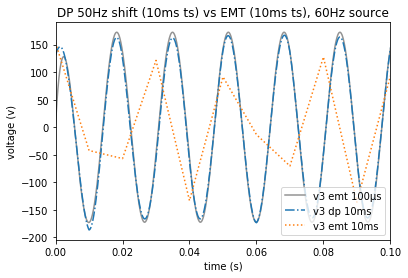

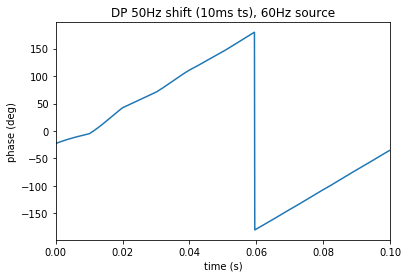

In [53]:
plt.plot(ts_dpsim_emt_f60['v3'].time, ts_dpsim_emt_f60['v3'].values, label='v3 emt 100µs', color = '#939393ff')
plt.plot(ts_dpsim_dp_f60_lTs_intp_emt['v3_intpl_shift'].time, ts_dpsim_dp_f60_lTs_intp_emt['v3_intpl_shift'].values, label='v3 dp 10ms', linestyle='-.') 
plt.plot(ts_dpsim_emt_f60_lTs_intp['v3_intpl'].time, ts_dpsim_emt_f60_lTs_intp['v3_intpl'].values, label='v3 emt 10ms', linestyle=':')
plt.xlim([0,0.1])
plt.xlabel('time (s)')
plt.ylabel('voltage (v)')
plt.title('DP 50Hz shift (10ms ts) vs EMT (10ms ts), 60Hz source')
plt.legend(loc='lower right')
plt.savefig('emt_dp_10ms_60Hz_src.pdf')

ts_dpsim_dp_f60_lTs_phasors = ts.phasors(ts_dpsim_dp_f60_lTs_intp)
plt.figure()
plt.plot(ts_dpsim_dp_f60_lTs_phasors['v3_intpl']['phase'].time, ts_dpsim_dp_f60_lTs_phasors['v3_intpl']['phase'].values, label='v3 dp 10ms')
plt.xlim([0,0.1])
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')
plt.title('DP 50Hz shift (10ms ts), 60Hz source')

As expected, the EMT results are completely wrong but what happened in the dynamic phasor simulation?  

There is some minimal distortion of the inductor transient at the beginning of the simulation. Apart from that, the results look fine. Especially, the 60Hz oscillation is clearly visible.

Let's have a look at the frequency shift of the dynamic phasor to explain this phenomenon.

## Dynamic Phasors and the Sampling Theorem

The figure below shows
- a bandpass signal with center frequency $f_C$, lower frequency $f_L$ and upper frequency $f_U$
- a shift of this bandpass signal by its center frequency $f_C$
- the resulting baseband representation with maximum frequency $B = f_U - f_C$

![dynamic phasor shift](Figures/dp_transform_freq.svg)

From the sampling theorem, it is clear that 
- the bandpass signal has to sampled with a frequency higher than $ 2 f_U = 2 (f_C + B) $
- while the baseband representation has to be sampled with a frequency higher than $ 2 B $

Therefore, the baseband signal can be sampled with a lower sampling rate than the original signal.
Translating this to the dynamic phasor concept: the baseband representation is the dynamic phasor and the bandpass signal is the original signal.

Applied to the 60Hz simulation with a 50Hz shift, this means that $f_C = 50Hz$ and $B = 10Hz$  
From this we can conclude that the sampling theorem would be violated for the dynamic phasor simulation if the sampling rate is equal or lower than $ 2B = 20Hz $ which equals a timestep of 50ms.

### 50ms timestep

In the results below, it can be seen that the dynamic phasor results are indeed incorrect for such a large timestep.

In [55]:
# read log file
work_dir = '../../../logs/DP_VS_RL_f60_vlargeTs/'
log_name = 'DP_VS_RL_f60_vlargeTs'
print(work_dir + log_name + '.csv')

ts_dpsim_dp_f60_vlTs = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_dp_f60_vlTs_intp = ts.interpolate_cmpl_list(ts_dpsim_dp_f60_vlTs, 0.0001)
ts_dpsim_dp_f60_vlTs_intp_emt = ts.frequency_shift_list(ts_dpsim_dp_f60_vlTs_intp, 50)

../../../logs/DP_VS_RL_f60_vlargeTs/DP_VS_RL_f60_vlargeTs.csv
column number: 4
results length: 4
real column names: []
complex column names: ['i_line', 'v1', 'v2', 'v3']


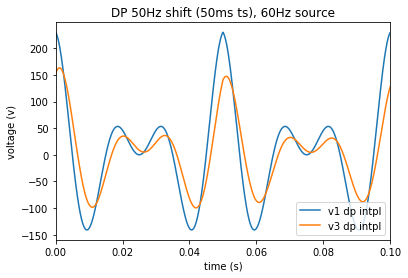

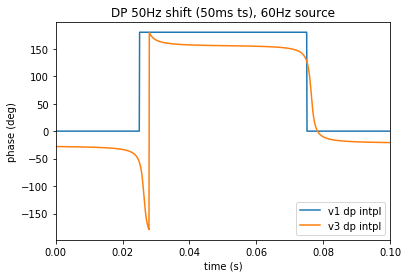

In [57]:
plt.plot(ts_dpsim_dp_f60_vlTs_intp_emt['v1_intpl_shift'].time, ts_dpsim_dp_f60_vlTs_intp_emt['v1_intpl_shift'].values, label='v1 dp intpl')
plt.plot(ts_dpsim_dp_f60_vlTs_intp_emt['v3_intpl_shift'].time, ts_dpsim_dp_f60_vlTs_intp_emt['v3_intpl_shift'].values, label='v3 dp intpl')
plt.xlim([0,0.1])
plt.xlabel('time (s)')
plt.ylabel('voltage (v)')
plt.title('DP 50Hz shift (50ms ts), 60Hz source')
plt.legend(loc='lower right')

ts_dpsim_dp_f60_vlTs_phasors = ts.phasors(ts_dpsim_dp_f60_vlTs_intp)
plt.figure()
plt.plot(ts_dpsim_dp_f60_vlTs_phasors['v1_intpl']['phase'].time, ts_dpsim_dp_f60_vlTs_phasors['v1_intpl']['phase'].values, label='v1 dp intpl')
plt.plot(ts_dpsim_dp_f60_vlTs_phasors['v3_intpl']['phase'].time, ts_dpsim_dp_f60_vlTs_phasors['v3_intpl']['phase'].values, label='v3 dp intpl')
plt.xlim([0,0.1])
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')
plt.title('DP 50Hz shift (50ms ts), 60Hz source')
plt.legend(loc='lower right')

## 500 Hz Source Frequency

So far, the difference between the assumed center frequency (50Hz) and the actual frequency of the signal (60Hz) was rather small.

What would happen if we choose a center frequency that is completely wrong for the signal at hand? In the following, we look at a source signal of 500Hz that is injected into the phasor shifted by 50Hz.
In this case $ 2B = 2 \cdot 450Hz = 900Hz $ for the baseband signal and $ f_{max} = 2 \cdot 500Hz = 1000Hz $ for the original signal. 

So, the benefit of using dynamic phasors is rather small here. We need a high sampling rate in both cases.

### 10µs timestep

A timestep of 10µs fulfills the sampling theorem for both signals, the original signal and the dynamic phasor representation.
Below, it is shown that for this timestep both simulations yield the same results. Furthermore, it is visible that the phase of the dynamic phasor is rotating quite quickly with 450Hz. 

In [58]:
# read log file
work_dir = '../../../logs/DP_VS_RL_f500/'
log_name = 'DP_VS_RL_f500'
print(work_dir + log_name + '.csv')

ts_dpsim_dp_f500 = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_dp_f500_emt = ts.frequency_shift_list(ts_dpsim_dp_f500, 50)

../../../logs/DP_VS_RL_f500/DP_VS_RL_f500.csv
column number: 4
results length: 2001
real column names: []
complex column names: ['i_line', 'v1', 'v2', 'v3']


In [59]:
# read log file
work_dir = '../../../logs/EMT_VS_RL_f500/'
log_name = 'EMT_VS_RL_f500'
print(work_dir + log_name + '.csv')

ts_dpsim_emt_f500 = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

../../../logs/EMT_VS_RL_f500/EMT_VS_RL_f500.csv
column number: 4
results length: 20000
real column names: ['i_line', 'v1', 'v2', 'v3']
complex column names: []


Text(0.5, 1.0, 'DP 50Hz shift (10µs ts), 500Hz source')

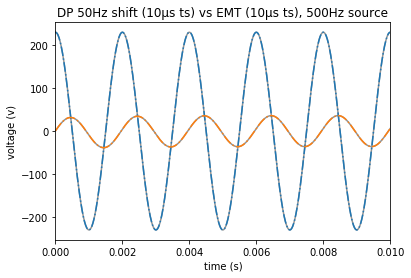

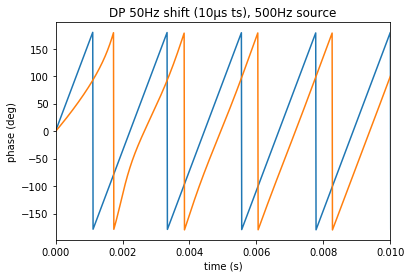

In [62]:
plt.plot(ts_dpsim_emt_f500['v1'].time, ts_dpsim_emt_f500['v1'].values, label='v1 emt', color = '#939393ff')
plt.plot(ts_dpsim_emt_f500['v3'].time, ts_dpsim_emt_f500['v3'].values, label='v3 emt', color = '#939393ff')
plt.plot(ts_dpsim_dp_f500_emt['v1_shift'].time, ts_dpsim_dp_f500_emt['v1_shift'].values, label='v1 dp', linestyle='-.')
plt.plot(ts_dpsim_dp_f500_emt['v3_shift'].time, ts_dpsim_dp_f500_emt['v3_shift'].values, label='v3 dp', linestyle='-.')
plt.xlim([0,0.01])
plt.xlabel('time (s)')
plt.ylabel('voltage (v)')
plt.title('DP 50Hz shift (10µs ts) vs EMT (10µs ts), 500Hz source')

ts_dpsim_dp_f500_phasors = ts.phasors(ts_dpsim_dp_f500)
plt.figure()
plt.plot(ts_dpsim_dp_f500_phasors['v1']['phase'].time, ts_dpsim_dp_f500_phasors['v1']['phase'].values, label='v1 dp')
plt.plot(ts_dpsim_dp_f500_phasors['v3']['phase'].time, ts_dpsim_dp_f500_phasors['v3']['phase'].values, label='v3 dp')
plt.xlim([0,0.01])
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')
plt.title('DP 50Hz shift (10µs ts), 500Hz source')

### 2ms timestep

A timestep of 2ms is violating the sampling theorem for both signals, the dynamic phasor (< ~1.05ms) and the original signal (< 1ms). 
Hence, the dynamic phasor simulation below returns incorrect results.

In [37]:
# read log file
work_dir = '../../../logs/DP_VS_RL_f500_largeTs/'
log_name = 'DP_VS_RL_f500_largeTs'
print(work_dir + log_name + '.csv')

ts_dpsim_dp_f500_lTs = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_dp_f500_lTs_intp = ts.interpolate_cmpl_list(ts_dpsim_dp_f500_lTs, 0.00001)
ts_dpsim_dp_f500_lTs_intp_emt = ts.frequency_shift_list(ts_dpsim_dp_f500_lTs_intp, 50)

../../../logs/DP_VS_RL_f500_largeTs/DP_VS_RL_f500_largeTs.csv
column number: 4
results length: 100
real column names: []
complex column names: ['i_line', 'v1', 'v2', 'v3']


Text(0.5, 1.0, 'DP 50Hz shift (2ms ts), 500Hz source')

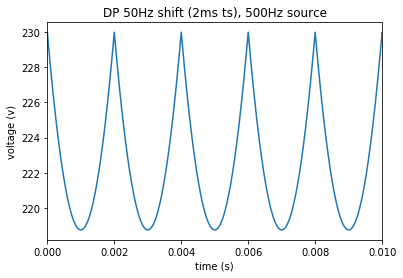

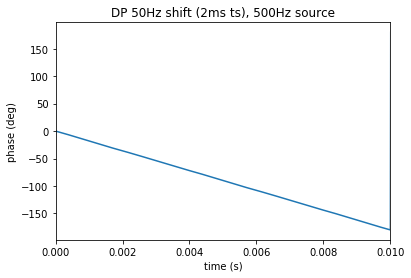

In [63]:
plt.plot(ts_dpsim_dp_f500_lTs_intp_emt['v1_intpl_shift'].time, ts_dpsim_dp_f500_lTs_intp_emt['v1_intpl_shift'].values)
plt.xlim([0,0.01])
plt.xlabel('time (s)')
plt.ylabel('voltage (v)')
plt.title('DP 50Hz shift (2ms ts), 500Hz source')

ts_dpsim_dp_f500_lTs_phasors = ts.phasors(ts_dpsim_dp_f500_lTs_intp)
plt.figure()
plt.plot(ts_dpsim_dp_f500_lTs_phasors['v1_intpl']['phase'].time, ts_dpsim_dp_f500_lTs_phasors['v1_intpl']['phase'].values)
plt.xlim([0,0.01])
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')
plt.title('DP 50Hz shift (2ms ts), 500Hz source')

### 2ms timestep with 500 Hz shift

Using dynamic phasor becomes more advantageous, the closer the shifting frequency is to the actual center frequency of the original bandpass.
If the shifting frequency and center frequency are close, we can increase the timestep dramatically.

The next simulation example has a timestep of 2ms again. This time, the 500Hz signal is shifted by 500Hz. Therefore, the maximum frequency of the baseband signal $B$ becomes 0. However, there is still the inductor transient because we are not starting from steady-state. If the simulation would start from steady-state, one simulation step would be enough because the dynamic phasor is not changing over time.

Apart from the small transient in the beginning the dynamic phasor results are constant. The phase stays at zero throughout the whole simulation.

In [64]:
# read log file
work_dir = '../../../logs/DP_VS_RL_f500_ph500/'
log_name = 'DP_VS_RL_f500_ph500'
print(work_dir + log_name + '.csv')

ts_dpsim_dp_f500_ph500 = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_dp_f500_ph500_intp = ts.interpolate_cmpl_list(ts_dpsim_dp_f500_ph500, 0.00001)
ts_dpsim_dp_f500_ph500_intp_emt = ts.frequency_shift_list(ts_dpsim_dp_f500_ph500_intp, 500)

../../../logs/DP_VS_RL_f500_ph500/DP_VS_RL_f500_ph500.csv
column number: 4
results length: 100
real column names: []
complex column names: ['i_line', 'v1', 'v2', 'v3']


Text(0.5, 1.0, 'DP 500Hz shift (10ms ts), 500Hz source')

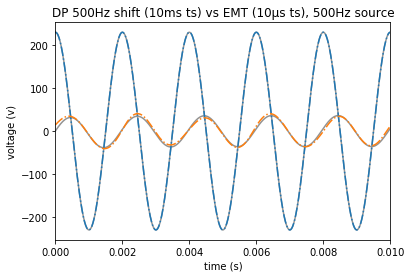

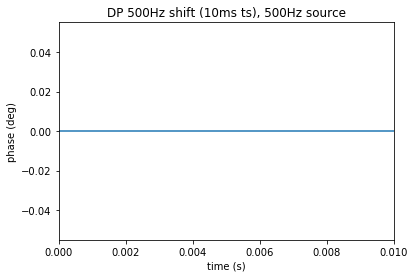

In [67]:
plt.plot(ts_dpsim_emt_f500['v1'].time, ts_dpsim_emt_f500['v1'].values, color = '#939393ff')
plt.plot(ts_dpsim_emt_f500['v3'].time, ts_dpsim_emt_f500['v3'].values, color = '#939393ff')
plt.plot(ts_dpsim_dp_f500_ph500_intp_emt['v1_intpl_shift'].time, ts_dpsim_dp_f500_ph500_intp_emt['v1_intpl_shift'].values, linestyle='-.')
plt.plot(ts_dpsim_dp_f500_ph500_intp_emt['v3_intpl_shift'].time, ts_dpsim_dp_f500_ph500_intp_emt['v3_intpl_shift'].values, linestyle='-.')
plt.xlim([0,0.01])
plt.xlabel('time (s)')
plt.ylabel('voltage (v)')
plt.title('DP 500Hz shift (10ms ts) vs EMT (10µs ts), 500Hz source')

ts_dpsim_dp_f500_ph500_intp_phasors = ts.phasors(ts_dpsim_dp_f500_ph500_intp)
plt.figure()
plt.plot(ts_dpsim_dp_f500_ph500_intp_phasors['v1_intpl']['phase'].time, ts_dpsim_dp_f500_ph500_intp_phasors['v1_intpl']['phase'].values)
plt.xlim([0,0.01])
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')
plt.title('DP 500Hz shift (10ms ts), 500Hz source')

At this point, you might think that these are all very nice examples but they are very basic. A realistic system is a lot more complex and the approach might not work as it did for the simple cases.

That is why we investigate a synchronous generator three-phase fault in the next simulation scenario.

## Sychronous Generator - Three-Phase Fault

The following generator simulation is parameterized according to example 3.1 in Kundur.  

At time 0.1s the generator is connected to ground with a very small resistance simulating a fault. Then at time 0.2s the fault is cleared.
The plot is showing the three phase currents of an EMT simulation and a DP simulation of DPsim. Here, the simulation timestep is rather small (50µs) because the generator model is nonlinear and becomes unstable very quickly for large timesteps.

In [19]:
# read log file
work_dir = '../../../logs/DP_SynGenDq7odODE_ThreePhFault/'
log_name = 'DP_SynGenDq7odODE_ThreePhFault'
print(work_dir + log_name + '.csv')
ts_dpsim_ode_tpf = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_ode_tpf_emt = ts.frequency_shift_list(ts_dpsim_ode_tpf, 60)
ts_dpsim_ode_tpf_phasors = ts.phasors(ts_dpsim_ode_tpf)

../../../logs/DP_SynGenDq7odODE_ThreePhFault/DP_SynGenDq7odODE_ThreePhFault.csv
column number: 10
results length: 6001
real column names: ['wr_gen']
complex column names: ['i_gen_0', 'i_gen_1', 'i_gen_2', 'i_load_0', 'i_load_1', 'i_load_2', 'v1_0', 'v1_1', 'v1_2']


In [20]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/SynchronousGenerator/SynGen_dq_7th_ThreePhFault/SL_SynGenDq7od_ThreePhFault_v_i.csv'
local_file = 'reference-results/SL_SynGenDq7od_ThreePhFault_v_i.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl_tpf = rt.read_timeseries_simulink(local_file)

column number: 6
results length: 6001
real column names: ['v1', 'v2', 'v3', 'i1', 'i2', 'i3']
complex column names: []


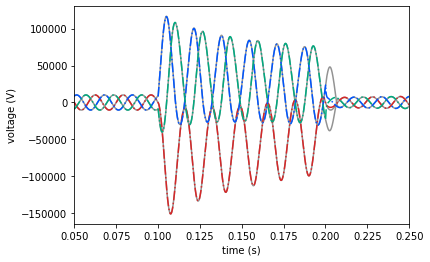

In [33]:
ts_sl_tpf_i1 = ts('i1', ts_sl_tpf['i1'].time, -ts_sl_tpf['i1'].values)
ts_sl_tpf_i2 = ts('i2', ts_sl_tpf['i2'].time, -ts_sl_tpf['i2'].values)
ts_sl_tpf_i3 = ts('i3', ts_sl_tpf['i3'].time, -ts_sl_tpf['i3'].values)

ts_sl_tpf_i1.label = 'ia_sl'
ts_sl_tpf_i2.label = 'ib_sl'
ts_sl_tpf_i3.label = 'ic_sl'
ts_dpsim_ode_tpf_emt['i_gen_0_shift'].label = 'ia_dpsim'
ts_dpsim_ode_tpf_emt['i_gen_1_shift'].label = 'ib_dpsim'
ts_dpsim_ode_tpf_emt['i_gen_2_shift'].label = 'ic_dpsim'
plt.plot(ts_sl_tpf_i1.time, ts_sl_tpf_i1.values, color = '#939393ff')
plt.plot(ts_sl_tpf_i2.time, ts_sl_tpf_i2.values, color = '#939393ff')
plt.plot(ts_sl_tpf_i3.time, ts_sl_tpf_i3.values, color = '#939393ff')
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_0_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_0_shift'].values, linestyle='-.', color = '#d62728ff')
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_1_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_1_shift'].values, linestyle='-.', color = '#0055ffff')
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_2_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_2_shift'].values, linestyle='-.', color = '#00aa7fff')
plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.xlim(0.05,0.25)
plt.savefig('syngen_three_phase_fault.pdf')

The next two plots show the phase of the dynamic phasor representing the phase A current. As you can see, the phasor is starting to rotate as soon as the fault is applied because the system frequency is differing from the nominal value of 60Hz. Then, the roation slows down after a short time as the phase deviation is becoming smaller.  

Similarly, the generator rotation speed presented in the second plot is starting to oscillate when the fault is applied and then the oscillations become smaller with time.

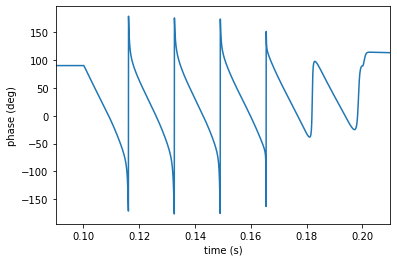

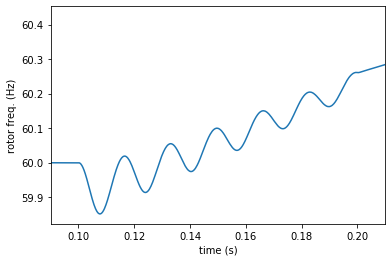

In [30]:
plt.figure()
plt.plot(ts_dpsim_ode_tpf_phasors['i_gen_0']['phase'].time, ts_dpsim_ode_tpf_phasors['i_gen_0']['phase'].values)
plt.xlim([0.09,0.21])
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')
plt.savefig('syngen_three_phase_fault_phase.pdf')

plt.figure()
plt.plot(ts_dpsim_ode_tpf['wr_gen'].time, ts_dpsim_ode_tpf['wr_gen'].values * 60)
plt.xlim([0.09,0.21])
plt.xlabel('time (s)')
plt.ylabel('rotor freq. (Hz)')
plt.savefig('syngen_three_phase_fault_wr.pdf')

So, the phase of the dynamic phasor is "catching" the frequency deviation in the same way as it did in the previous simpler simulation examples. 